# Azure Demand Forecasting - Data Loading & EDA

This notebook covers:
1. Loading the raw datasets
2. Basic data exploration
3. Data cleaning steps
4. Initial exploratory data analysis

**Author**: SCSBalaji  
**Date**: 2025-08-27

## 1. Import Required Libraries

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Date handling
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


## 2. Load Raw Datasets

In [2]:
# Load Azure usage data
print("📂 Loading Azure usage data...")
azure_usage = pd.read_csv('../data/raw/azure_usage.csv')
print(f"Azure usage data shape: {azure_usage.shape}")

# Load external factors data
print("\n📂 Loading external factors data...")
external_factors = pd.read_csv('../data/raw/external_factors.csv')
print(f"External factors data shape: {external_factors.shape}")

print("\n✅ Both datasets loaded successfully!")

📂 Loading Azure usage data...
Azure usage data shape: (1080, 6)

📂 Loading external factors data...
External factors data shape: (90, 4)

✅ Both datasets loaded successfully!


## 3. Initial Data Exploration

In [3]:
# Explore Azure usage data
print("=== AZURE USAGE DATA OVERVIEW ===")
print("\nFirst 5 rows:")
print(azure_usage.head())

print("\nDataset Info:")
print(azure_usage.info())

print("\nColumn Names:")
print(azure_usage.columns.tolist())

print("\nBasic Statistics:")
print(azure_usage.describe())

=== AZURE USAGE DATA OVERVIEW ===

First 5 rows:
         date   region resource_type  usage_cpu  usage_storage  users_active
0  2023-01-01  East US            VM         88           1959           470
1  2023-01-01  East US       Storage         92           1595           388
2  2023-01-01  East US     Container         70            621           414
3  2023-01-01  West US            VM         60           1982           287
4  2023-01-01  West US       Storage         85           1371           351

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           1080 non-null   object
 1   region         1080 non-null   object
 2   resource_type  1080 non-null   object
 3   usage_cpu      1080 non-null   int64 
 4   usage_storage  1080 non-null   int64 
 5   users_active   1080 non-null   int64 
dtypes: int64(3), object

In [4]:
# Explore External factors data
print("=== EXTERNAL FACTORS DATA OVERVIEW ===")
print("\nFirst 5 rows:")
print(external_factors.head())

print("\nDataset Info:")
print(external_factors.info())

print("\nColumn Names:")
print(external_factors.columns.tolist())

print("\nBasic Statistics:")
print(external_factors.describe())

=== EXTERNAL FACTORS DATA OVERVIEW ===

First 5 rows:
         date  economic_index  cloud_market_demand  holiday
0  2023-01-01          104.97                 0.99        1
1  2023-01-02          106.48                 1.15        0
2  2023-01-03           97.66                 0.98        0
3  2023-01-04          115.79                 1.08        0
4  2023-01-05           95.31                 1.05        0

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 90 non-null     object 
 1   economic_index       90 non-null     float64
 2   cloud_market_demand  90 non-null     float64
 3   holiday              90 non-null     int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 2.9+ KB
None

Column Names:
['date', 'economic_index', 'cloud_market_demand', 'holiday']

Basic Statistics:
       

## 4. Check for Data Quality Issues

In [5]:
# Check for missing values in Azure usage data
print("=== MISSING VALUES CHECK ===")
print("\nAzure Usage Data:")
missing_azure = azure_usage.isnull().sum()
print(missing_azure)

print("\nExternal Factors Data:")
missing_external = external_factors.isnull().sum()
print(missing_external)

# Calculate percentage of missing values
print("\n=== MISSING VALUES PERCENTAGE ===")
print("Azure Usage:")
print((missing_azure / len(azure_usage)) * 100)
print("\nExternal Factors:")
print((missing_external / len(external_factors)) * 100)

=== MISSING VALUES CHECK ===

Azure Usage Data:
date             0
region           0
resource_type    0
usage_cpu        0
usage_storage    0
users_active     0
dtype: int64

External Factors Data:
date                   0
economic_index         0
cloud_market_demand    0
holiday                0
dtype: int64

=== MISSING VALUES PERCENTAGE ===
Azure Usage:
date             0.0
region           0.0
resource_type    0.0
usage_cpu        0.0
usage_storage    0.0
users_active     0.0
dtype: float64

External Factors:
date                   0.0
economic_index         0.0
cloud_market_demand    0.0
holiday                0.0
dtype: float64


In [6]:
# Check for duplicate rows
print("=== DUPLICATE ROWS CHECK ===")
azure_duplicates = azure_usage.duplicated().sum()
external_duplicates = external_factors.duplicated().sum()

print(f"Azure usage duplicates: {azure_duplicates}")
print(f"External factors duplicates: {external_duplicates}")

# Check for unique values in categorical columns
print("\n=== UNIQUE VALUES IN KEY COLUMNS ===")
print(f"Unique regions: {azure_usage['region'].unique()}")
print(f"Unique resource types: {azure_usage['resource_type'].unique()}")
print(f"Date range (Azure): {azure_usage['date'].min()} to {azure_usage['date'].max()}")
print(f"Date range (External): {external_factors['date'].min()} to {external_factors['date'].max()}")

=== DUPLICATE ROWS CHECK ===
Azure usage duplicates: 0
External factors duplicates: 0

=== UNIQUE VALUES IN KEY COLUMNS ===
Unique regions: ['East US' 'West US' 'North Europe' 'Southeast Asia']
Unique resource types: ['VM' 'Storage' 'Container']
Date range (Azure): 2023-01-01 to 2023-03-31
Date range (External): 2023-01-01 to 2023-03-31


## 5. Data Cleaning Steps

In [7]:
# Step 1: Convert date columns to datetime
print("🔧 Step 1: Standardizing date formats...")

# Convert date columns
azure_usage['date'] = pd.to_datetime(azure_usage['date'])
external_factors['date'] = pd.to_datetime(external_factors['date'])

print("✅ Date columns converted to datetime format")
print(f"Azure date type: {azure_usage['date'].dtype}")
print(f"External date type: {external_factors['date'].dtype}")

🔧 Step 1: Standardizing date formats...
✅ Date columns converted to datetime format
Azure date type: datetime64[ns]
External date type: datetime64[ns]


In [8]:
# Step 2: Handle missing values (if any)
print("🔧 Step 2: Handling missing values...")

# For this dataset, let's check if there are any missing values and handle them
azure_before = len(azure_usage)
external_before = len(external_factors)

# Remove rows with missing values (you can also choose to fill them)
azure_usage_clean = azure_usage.dropna()
external_factors_clean = external_factors.dropna()

azure_after = len(azure_usage_clean)
external_after = len(external_factors_clean)

print(f"Azure data: {azure_before} -> {azure_after} rows (removed {azure_before - azure_after})")
print(f"External data: {external_before} -> {external_after} rows (removed {external_before - external_after})")

🔧 Step 2: Handling missing values...
Azure data: 1080 -> 1080 rows (removed 0)
External data: 90 -> 90 rows (removed 0)


In [9]:
# Step 3: Remove duplicate rows
print("🔧 Step 3: Removing duplicate rows...")

azure_before_dup = len(azure_usage_clean)
external_before_dup = len(external_factors_clean)

azure_usage_clean = azure_usage_clean.drop_duplicates()
external_factors_clean = external_factors_clean.drop_duplicates()

azure_after_dup = len(azure_usage_clean)
external_after_dup = len(external_factors_clean)

print(f"Azure data: {azure_before_dup} -> {azure_after_dup} rows (removed {azure_before_dup - azure_after_dup} duplicates)")
print(f"External data: {external_before_dup} -> {external_after_dup} rows (removed {external_before_dup - external_after_dup} duplicates)")

🔧 Step 3: Removing duplicate rows...
Azure data: 1080 -> 1080 rows (removed 0 duplicates)
External data: 90 -> 90 rows (removed 0 duplicates)


In [10]:
# Step 4: Data validation and normalization
print("🔧 Step 4: Data validation and normalization...")

# Check for any negative values or outliers
print("\nChecking for negative values:")
numeric_cols = ['usage_cpu', 'usage_storage', 'users_active']
for col in numeric_cols:
    negative_count = (azure_usage_clean[col] < 0).sum()
    print(f"{col}: {negative_count} negative values")

# Check data ranges
print("\nData ranges:")
print(f"CPU usage range: {azure_usage_clean['usage_cpu'].min()} - {azure_usage_clean['usage_cpu'].max()}")
print(f"Storage usage range: {azure_usage_clean['usage_storage'].min()} - {azure_usage_clean['usage_storage'].max()}")
print(f"Active users range: {azure_usage_clean['users_active'].min()} - {azure_usage_clean['users_active'].max()}")

print("\n✅ Data cleaning completed!")

🔧 Step 4: Data validation and normalization...

Checking for negative values:
usage_cpu: 0 negative values
usage_storage: 0 negative values
users_active: 0 negative values

Data ranges:
CPU usage range: 50 - 99
Storage usage range: 500 - 1995
Active users range: 200 - 499

✅ Data cleaning completed!


## 6. Basic Exploratory Data Analysis

📊 ANALYSIS 1: Average Daily CPU Usage per Region
region
East US           75.640741
North Europe      74.881481
West US           74.207407
Southeast Asia    73.877778
Name: usage_cpu, dtype: float64


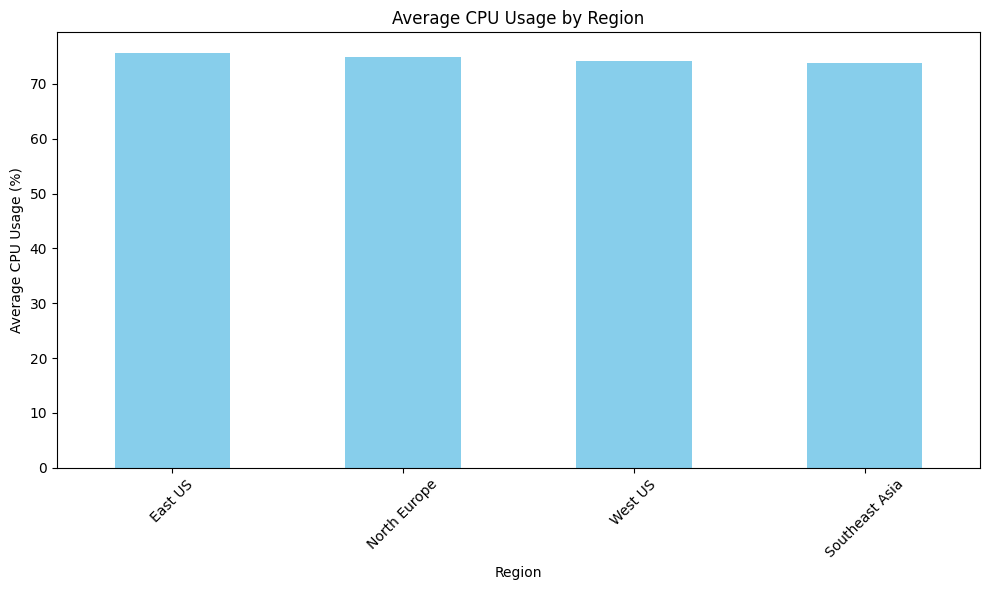

In [11]:
# Calculate average daily CPU usage per region
print("📊 ANALYSIS 1: Average Daily CPU Usage per Region")
avg_cpu_by_region = azure_usage_clean.groupby('region')['usage_cpu'].mean().sort_values(ascending=False)
print(avg_cpu_by_region)

# Visualize
plt.figure(figsize=(10, 6))
avg_cpu_by_region.plot(kind='bar', color='skyblue')
plt.title('Average CPU Usage by Region')
plt.xlabel('Region')
plt.ylabel('Average CPU Usage (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

📊 ANALYSIS 2: Peak Demand per Month
Peak CPU usage by month:
month
2023-01    99
2023-02    99
2023-03    99
Freq: M, Name: usage_cpu, dtype: int64


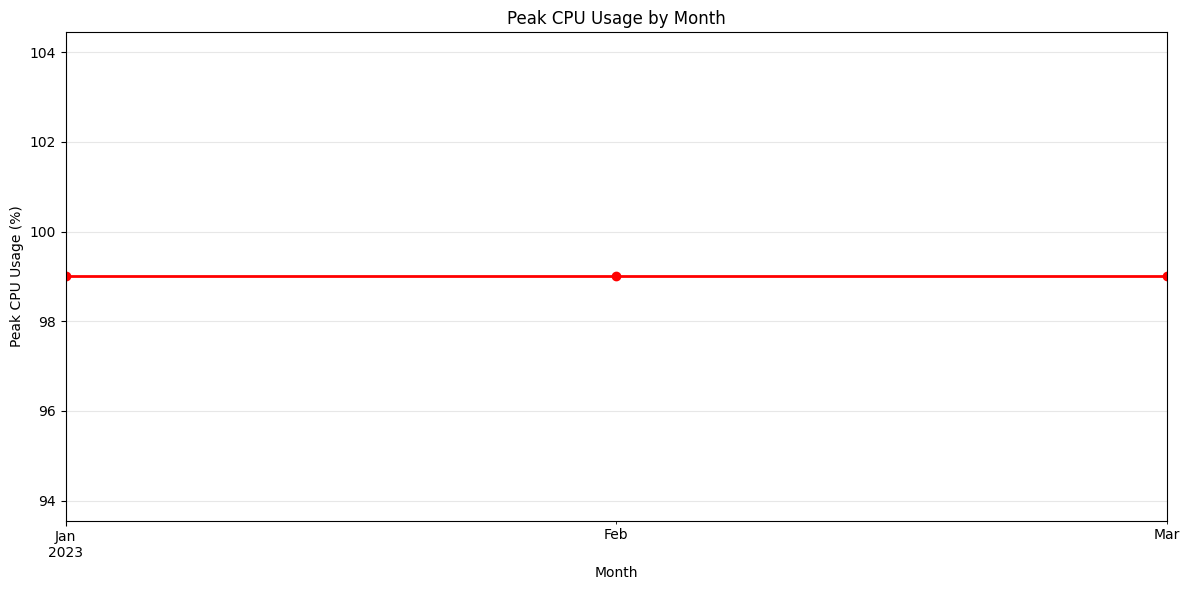

In [12]:
# Calculate peak demand per month
print("📊 ANALYSIS 2: Peak Demand per Month")

# Add month column
azure_usage_clean['month'] = azure_usage_clean['date'].dt.to_period('M')

# Calculate peak CPU usage per month
peak_cpu_by_month = azure_usage_clean.groupby('month')['usage_cpu'].max()
print("Peak CPU usage by month:")
print(peak_cpu_by_month)

# Visualize
plt.figure(figsize=(12, 6))
peak_cpu_by_month.plot(kind='line', marker='o', color='red', linewidth=2)
plt.title('Peak CPU Usage by Month')
plt.xlabel('Month')
plt.ylabel('Peak CPU Usage (%)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

📊 ANALYSIS 3: Top 5 Regions by Total Usage
Top 5 regions by total usage:
region
West US           460631
East US           451747
Southeast Asia    445551
North Europe      445481
Name: total_usage, dtype: int64


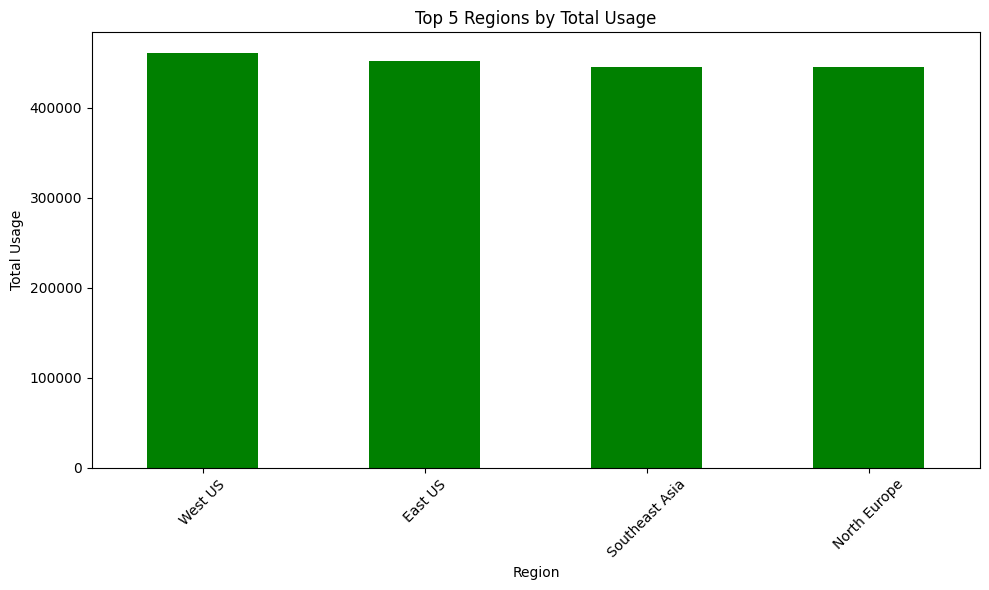

In [13]:
# Find top 5 regions by total usage
print("📊 ANALYSIS 3: Top 5 Regions by Total Usage")

# Calculate total usage (sum of CPU + Storage + Users)
azure_usage_clean['total_usage'] = (azure_usage_clean['usage_cpu'] + 
                                   azure_usage_clean['usage_storage'] + 
                                   azure_usage_clean['users_active'])

top_regions = azure_usage_clean.groupby('region')['total_usage'].sum().sort_values(ascending=False).head(5)
print("Top 5 regions by total usage:")
print(top_regions)

# Visualize
plt.figure(figsize=(10, 6))
top_regions.plot(kind='bar', color='green')
plt.title('Top 5 Regions by Total Usage')
plt.xlabel('Region')
plt.ylabel('Total Usage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 7. Additional Insights

📊 ADDITIONAL ANALYSIS: Usage Trends Over Time


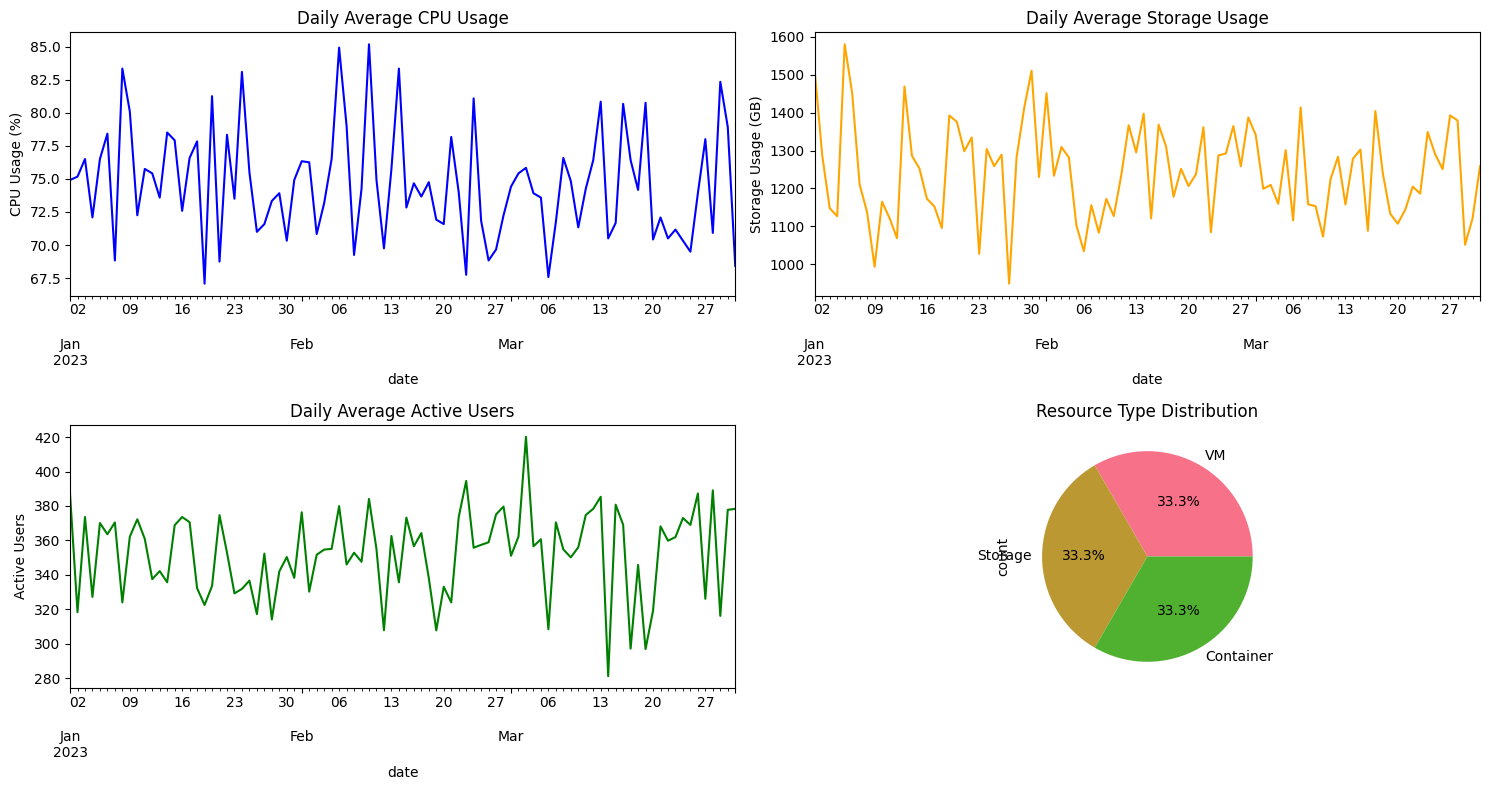

In [14]:
# Usage trends over time
print("📊 ADDITIONAL ANALYSIS: Usage Trends Over Time")

# Group by date and calculate daily averages
daily_usage = azure_usage_clean.groupby('date').agg({
    'usage_cpu': 'mean',
    'usage_storage': 'mean',
    'users_active': 'mean'
})

# Plot trends
plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1)
daily_usage['usage_cpu'].plot(color='blue')
plt.title('Daily Average CPU Usage')
plt.ylabel('CPU Usage (%)')

plt.subplot(2, 2, 2)
daily_usage['usage_storage'].plot(color='orange')
plt.title('Daily Average Storage Usage')
plt.ylabel('Storage Usage (GB)')

plt.subplot(2, 2, 3)
daily_usage['users_active'].plot(color='green')
plt.title('Daily Average Active Users')
plt.ylabel('Active Users')

plt.subplot(2, 2, 4)
# Resource type distribution
azure_usage_clean['resource_type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Resource Type Distribution')

plt.tight_layout()
plt.show()

## 8. Summary of Findings

In [15]:
print("=== DATA CLEANING SUMMARY ===")
print(f"✅ Azure usage dataset: {len(azure_usage_clean)} records")
print(f"✅ External factors dataset: {len(external_factors_clean)} records")
print(f"✅ Date range: {azure_usage_clean['date'].min().date()} to {azure_usage_clean['date'].max().date()}")
print(f"✅ Regions covered: {azure_usage_clean['region'].nunique()}")
print(f"✅ Resource types: {azure_usage_clean['resource_type'].nunique()}")

print("\n=== KEY INSIGHTS ===")
print(f"🔹 Highest average CPU usage region: {avg_cpu_by_region.index[0]} ({avg_cpu_by_region.iloc[0]:.1f}%)")
print(f"🔹 Peak CPU usage recorded: {azure_usage_clean['usage_cpu'].max()}%")
print(f"🔹 Most active region by total usage: {top_regions.index[0]}")

print("\n✅ Data is now clean and ready for merging with external factors!")

=== DATA CLEANING SUMMARY ===
✅ Azure usage dataset: 1080 records
✅ External factors dataset: 90 records
✅ Date range: 2023-01-01 to 2023-03-31
✅ Regions covered: 4
✅ Resource types: 3

=== KEY INSIGHTS ===
🔹 Highest average CPU usage region: East US (75.6%)
🔹 Peak CPU usage recorded: 99%
🔹 Most active region by total usage: West US

✅ Data is now clean and ready for merging with external factors!


## 9. Save Cleaned Datasets (Optional)
Uncomment the lines below if you want to save the cleaned individual datasets before merging.

In [16]:
# Save cleaned datasets for future use
azure_usage_clean.to_csv('../data/processed/azure_usage_cleaned.csv', index=False)
external_factors_clean.to_csv('../data/processed/external_factors_cleaned.csv', index=False)
print("✅ Cleaned datasets saved!")

✅ Cleaned datasets saved!


In [17]:
# Merge on both 'date' and 'region' if both columns exist in both datasets
merge_cols = ['date']
if 'region' in external_factors_clean.columns and 'region' in azure_usage_clean.columns:
    merge_cols.append('region')

merged_data = pd.merge(
    azure_usage_clean,
    external_factors_clean,
    on=merge_cols,
    how='inner'  # Use 'left' if you want to keep all azure_usage rows
)

print(f"Merged dataset shape: {merged_data.shape}")
print(merged_data.head())

# Save the merged dataset
import os
os.makedirs('../data/processed', exist_ok=True)
merged_data.to_csv('../data/processed/cleaned_merged.csv', index=False)
print("✅ Merged data saved to '../data/processed/cleaned_merged.csv'")

Merged dataset shape: (1080, 11)
        date   region resource_type  usage_cpu  usage_storage  users_active  \
0 2023-01-01  East US            VM         88           1959           470   
1 2023-01-01  East US       Storage         92           1595           388   
2 2023-01-01  East US     Container         70            621           414   
3 2023-01-01  West US            VM         60           1982           287   
4 2023-01-01  West US       Storage         85           1371           351   

     month  total_usage  economic_index  cloud_market_demand  holiday  
0  2023-01         2517          104.97                 0.99        1  
1  2023-01         2075          104.97                 0.99        1  
2  2023-01         1105          104.97                 0.99        1  
3  2023-01         2329          104.97                 0.99        1  
4  2023-01         1807          104.97                 0.99        1  
✅ Merged data saved to '../data/processed/cleaned_merged.csv